In [142]:
import keras
import numpy as np
from keras import datasets
from numpy.linalg import eig 
import matplotlib.pyplot as plt
from numpy import cov
%matplotlib inline

In [143]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [144]:
x_train = x_train.reshape(60000, 28*28)

In [145]:
mean = np.mean(x_train, axis=0)
mean.shape

(784,)

In [146]:
cc = x_train - mean

In [147]:
cov_mat = cov(cc.T)

In [148]:
val, vec = eig(cov_mat)

In [149]:
dd = cc.dot(vec[:,:2])

/home/yewwahc/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


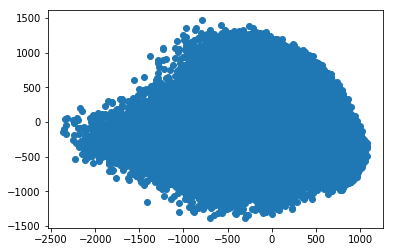

In [150]:
plt.scatter(dd[:,0], dd[:,1])

/home/yewwahc/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/yewwahc/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:903: ComplexWarning: Casting complex values to real discards the imaginary part
  self._transforms[:, 0, 0] = scale
/home/yewwahc/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:904: ComplexWarning: Casting complex values to real discards the imaginary part
  self._transforms[:, 1, 1] = scale


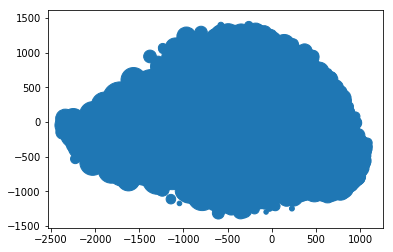

In [152]:
comp_3 = cc.dot(vec[:,:3])
plt.scatter(comp_3[:,0], comp_3[:,1], comp_3[:,2])